<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

## Import

In [1]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

## Mô hình Logistic Regression dự đoán dân số châu Âu trong tương lai

## Data preparation

In [2]:
# YOUR CODE HERE (OPTION) 
cleaned_df = pd.read_csv("../data/processed/21127021_europe_processed.csv")

In [3]:
cleaned_df.head()

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,2775634.0,1391086.0,1384548.0,10.813117,10.096538,9.0,26.361868,9.386339,8.456056,15.410524,...,7131.404452,19.002727,73.712777,74.398198,80.747814,95.606712,62.731991,97.748993,2022,Albania
1,2811666.0,1407212.0,1404454.0,10.240000,11.325000,9.0,21.562780,34.618040,39.186390,17.459200,...,7131.404452,19.002727,73.712777,74.087000,79.173000,97.604950,60.317581,98.223259,2021,Albania
2,2837849.0,1418585.0,1419264.0,10.285000,10.785000,9.0,20.781540,35.541970,40.169250,16.812830,...,7131.404452,44.580000,73.712777,74.632000,79.676000,100.613602,61.392578,99.468590,2020,Albania
3,2854191.0,1425363.0,1428828.0,10.343000,8.480000,9.0,20.150670,36.416850,41.600220,16.203900,...,7131.404452,40.110000,73.712777,77.168000,81.666000,104.310257,62.076092,101.720718,2019,Albania
4,2866376.0,1430495.0,1435881.0,10.517000,8.308000,9.0,19.745660,37.285730,42.271740,15.573180,...,7131.404452,37.830000,73.712777,77.037000,81.608000,107.403679,56.608871,105.708557,2018,Albania


## Feature engineering

In [4]:
# YOUR CODE HERE (OPTION) 
data = pd.DataFrame()
data['Total Europe Population'] = cleaned_df.groupby('Year')['Total Population'].sum()
data['Year'] = data.index
data.reset_index(inplace=True, drop=True)
data.head()

,Total Europe Population,Year
0,546092400.0,1995
1,546691513.0,1996
2,547182865.0,1997
3,547568671.0,1998
4,548065465.0,1999


In [5]:
y, X = data['Total Europe Population'].to_numpy(), data['Year'].to_numpy()
X = X.reshape(1, -1).T

## Training model

In [6]:
# YOUR CODE HERE (OPTION) 
clf = LinearRegression()
clf.fit(X, y)

LinearRegression()

## Evaluation

In [7]:
# YOUR CODE HERE (OPTION) 
clf.score(X, y)

0.9555500032725578

## Prediction

In [8]:
# YOUR CODE HERE (OPTION) 
x_predict = np.linspace(2023, 2035, num = 2035-2023+1, dtype=int)
x_predict = x_predict.reshape(1, -1).T

In [9]:
y_predict = clf.predict(x_predict)
y_predict

array([5.76119010e+08, 5.77252448e+08, 5.78385885e+08, 5.79519322e+08,
       5.80652760e+08, 5.81786197e+08, 5.82919634e+08, 5.84053072e+08,
       5.85186509e+08, 5.86319946e+08, 5.87453383e+08, 5.88586821e+08,
       5.89720258e+08])

## Results analysis

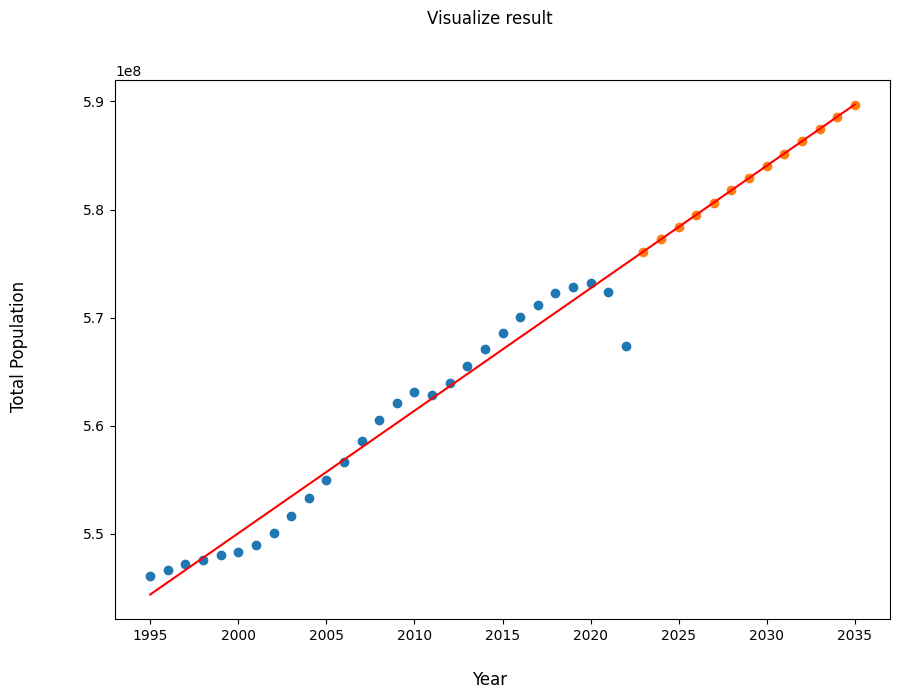

In [10]:
# YOUR CODE HERE (OPTION) 
fig, ax = plt.subplots(figsize=(10, 7))

fig.suptitle('Visualize result')
fig.supxlabel('Year')
fig.supylabel("Total Population")
ax.scatter(X, y)
ax.scatter(x_predict, y_predict)

# line regression
x_line = np.linspace(1995, 2035, num = 30, dtype = int)
y_line = clf.predict(x_line.reshape(1, -1).T)
ax.plot(x_line, y_line, color = 'red')
plt.show()

### Nhận xét
Theo mô hình linear regression trên ta thu được mô hình đạt điểm tin cậy khá cao với 0,95.

## Conclusion

**Your conclusion**
Mô hình linear regresstion cho ta dự đoán về dân số tương lai của châu Âu sẽ tăng chậm trong tương lai. Dự đoán tới năm 2035 dân số châu Âu sẽ gần chạm mức 590 triệu dân và có thể tiếp tục tăng theo mô hình.